In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
# 設定 data_path
dir_data = 'D:/Coding Project/GitHub/ML100-Days/data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')

app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

### 練習時間
####觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息

計算任意欄位的平均數及標準差

畫出任意欄位的直方圖

In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
app_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [6]:
app_train['AMT_INCOME_TOTAL'].sum()

51907216960.935

In [7]:
app_train['AMT_INCOME_TOTAL'].var()

56227386501.174484

In [8]:
app_train['AMT_INCOME_TOTAL'].cumsum()

0         2.025000e+05
1         4.725000e+05
2         5.400000e+05
3         6.750000e+05
4         7.965000e+05
5         8.955000e+05
6         1.066500e+06
7         1.426500e+06
8         1.539000e+06
9         1.674000e+06
10        1.786500e+06
11        1.824919e+06
12        1.892419e+06
13        2.117419e+06
14        2.306419e+06
15        2.463919e+06
16        2.571919e+06
17        2.652919e+06
18        2.765419e+06
19        2.855419e+06
20        2.990419e+06
21        3.192919e+06
22        3.642919e+06
23        3.726169e+06
24        3.861169e+06
25        3.951169e+06
26        4.063669e+06
27        4.176169e+06
28        4.446169e+06
29        4.536169e+06
              ...     
307481    5.190161e+10
307482    5.190183e+10
307483    5.190193e+10
307484    5.190247e+10
307485    5.190274e+10
307486    5.190303e+10
307487    5.190315e+10
307488    5.190331e+10
307489    5.190353e+10
307490    5.190361e+10
307491    5.190370e+10
307492    5.190429e+10
307493    5

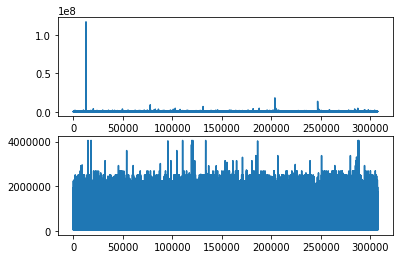

In [9]:
# 2 行 1 列 subplot 中的第 1 個 subplot
col_1 = app_train['AMT_INCOME_TOTAL']
plt.subplot(2, 1, 1)
plt.plot(col_1)

# 2 行 1 列 subplot 中的第 2 個 subplot
col_2 = app_train['AMT_CREDIT']
plt.subplot(2, 1, 2)
#plt.figure()
plt.plot(col_2)

plt.show()

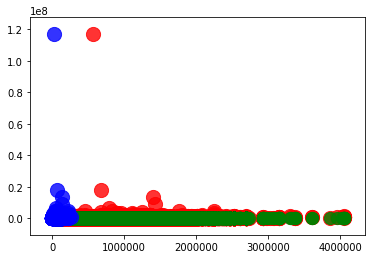

In [10]:
col_3 = app_train['AMT_ANNUITY']

# 用scatter 函數繪製散點圖，參數 c 表示點的顏色， s 是點的大小， alpha 是透明度
plt.scatter(col_2, col_1, c = 'r', s = 200, alpha = 0.8)
plt.scatter(col_2, col_3, c = 'g', s = 150, alpha = 0.8)
plt.scatter(col_3, col_1, c = 'b', s = 200, alpha = 0.8) 

plt.show()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


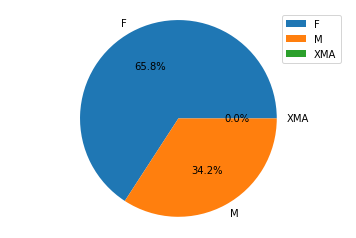

In [11]:
labels = ['F', 'M', 'XMA']  #app_train['AMT_CREDIT'].unique()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  
le.fit(app_train['CODE_GENDER']) 
le.transform(app_train['CODE_GENDER'])
col_4 = pd.Series.value_counts(app_train['CODE_GENDER'])
print(col_4)

# 畫圓餅圖
plt.pie(col_4, labels = labels, autopct = '%1.1f%%')  # autopct 指定了數值的精度格式
plt.axis('equal')  # plt.axis('equal') 設置了座標軸大小一致
plt.legend()  # plt.legend() 指明要繪製圖例（見下圖的右上角）

plt.show()

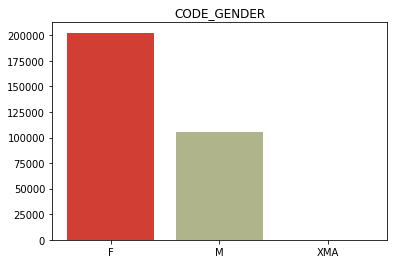

In [12]:
# 畫長條圖
N = pd.Series.nunique(app_train['CODE_GENDER']) # 該資料欄位的類別數量

# 生成數列
x = np.arange(N)

# 隨機生成顏色，表示先生成 9 ( N x 3）個隨機數，然後將它們組裝成 3 行，那麼每行就是三個數，對應顏色的三個組成
colors = np.random.rand(N * 3).reshape(N, -1) 

plt.title("CODE_GENDER")
plt.bar(x, col_4, alpha = 0.8, color = colors, tick_label = labels)
plt.show()